In [1]:
import sys
import os
my_path = os.path.dirname(os.getcwd())
sys.path.append(my_path)

import prev_ob_models.Doxey2022.isolated_cells as ic
from neuron import h
from neuron.units import ms
import matplotlib.pyplot as plt
import numpy as np

--No graphics will be displayed.


In [2]:
# if not os.path.isdir('../prev_ob_models/Doxey2022/Mechanisms/x86_64'):
os.system('python ../prev_ob_models/Doxey2022/compile_mechs.py')
# else:
    # print('Mechanisms already compiled')

/home/kedoxey/OB_Model/OlfactoryBulb/prev_ob_models/Doxey2022/Mechanisms
Mod files: "./AmpaNmdaSyn.mod" "./CaPool.mod" "./CaT.mod" "./GabaSyn.mod" "./gapjunction.mod" "./Ih.mod" "./KA.mod" "./KCa.mod" "./Kd.mod" "./KM.mod" "./Kslow.mod" "./LCa.mod" "./Na.mod" "./VecStim.mod"

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/home/kedoxey/.conda/envs/OBModel_linux/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
g++ -O2 -DVERSION_INFO='7.8.2' -std=c++11 -shared -fPIC  -I /home/kedoxey/.conda/envs/OBModel_linux/lib/python3.7/site-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./AmpaNmdaSyn.o ./CaPool.o ./CaT.o ./GabaSyn.o ./gapjunction.o ./Ih.o ./KA.o ./KCa.o ./Kd.o ./KM.o ./Kslow.o ./LCa.o ./Na.o ./VecStim.o  -L/home/kedoxey/.conda/envs/OBModel_linux/lib/python3.7/site-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/home/kedoxey/.conda/e

0

In [3]:
# mc_cells = [ic.MC1(), ic.MC2(), ic.MC3(), ic.MC4(), ic.MC5()]
tc_cells = [ic.TC1(), ic.TC2(), ic.TC3(), ic.TC4(), ic.TC5()]
# gc_cells = [ic.GC1(), ic.GC2(), ic.GC3(), ic.GC4(), ic.GC5()]

Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.


In [4]:
mc_apic_sources = {1: [7,8,10,11,15,16,18,19,20,22,23,25,26], 2: [4,5,9,10], 
                   3: [7,8,9,14,15,17,18,19,20,21,25,27,28,29,31,32,33], 4: [5,7,8,10,11,12], 5: [4,5,7,8]}
mc_dend_sources = {1: [1,2,12,6,7,9,10], 2: [6,9,11,12,15,18,21,24,25,26],
                    3: [0,2,4,5,8,11,12,14,16,17,19,21,22,24,25], 4: [2,3,4,5,7,9,10,15,16,17,19,20,25,26,28,29,30,32,33], 5: [3,4,6,7,9,11,12,15,16,18,21,22,23,26,28,32,33,34,35]}

mc_sources = {'apic': [ [7,8,10,11,15,16,18,19,20,22,23,25,26], [4,5,9,10], 
                       [7,8,9,14,15,17,18,19,20,21,25,27,28,29,31,32,33], [5,7,8,10,11,12], [4,5,7,8] ],
              'dend': [ [1,2,12,6,7,9,10], [6,9,11,12,15,18,21,24,25,26], [0,2,4,5,8,11,12,14,16,17,19,21,22,24,25], 
                       [2,3,4,5,7,9,10,15,16,17,19,20,25,26,28,29,30,32,33], [3,4,6,7,9,11,12,15,16,18,21,22,23,26,28,32,33,34,35] ]}

tc_apic_sources = {1: [2,6,7,10,12,13,15,16,20,21,23,25,27,28,31,32,35,36,38,39,43,48,49,52,54,55,58,60,61,66,67,68,69,71,73,74], 
                   2: [7,8,9,11,12,13,14,18,19,23,24,25,26,27,31,33,37,38,39,41,43,44,45,50,51,52,53,55,56,57], 3: [5,6,7,11,12,13,14,16,17,19,20], 
                   4: [8,9,10,13,14,15,16,24,25,27,28,29,30,31,32,33,43,45,46,48,49,50,55,56,57,58,59,60,64,65,67,68,69,76,77,78,81,82,84,85,87,88,95,96,97,98,99,100,106,107,108,109,111,112,113,115,116,122,123,127,128,129,130,134,136,17,138,141,142,143], 
                   5: [5,6,7,9,10,12,13]}
tc_dend_sources = {1: [3,4,7,8,9], 2: [0,2,4,7,8,9,10], 3: [2,3,4,6,7], 4: [1,2,5,6,9,10,12,13], 5: [3,4,5,8,9,10,13,14,15]}

tc_sources = {'apic': [ [2,6,7,10,12,13,15,16,20,21,23,25,27,28,31,32,35,36,38,39,43,48,49,52,54,55,58,60,61,66,67,68,69,71,73,74], 
                       [7,8,9,11,12,13,14,18,19,23,24,25,26,27,31,33,37,38,39,41,43,44,45,50,51,52,53,55,56,57], [5,6,7,11,12,13,14,16,17,19,20], 
                       [8,9,10,13,14,15,16,24,25,27,28,29,30,31,32,33,43,45,46,48,49,50,55,56,57,58,59,60,64,65,67,68,69,76,77,78,81,82,84,85,87,88,95,96,97,98,99,100,106,107,108,109,111,112,113,115,116,122,123,127,128,129,130,134,136,17,138,141,142,143], 
                       [5,6,7,9,10,12,13] ],
              'dend': [ [3,4,7,8,9], [0,2,4,7,8,9,10], [2,3,4,6,7], [1,2,5,6,9,10,12,13], [3,4,5,8,9,10,13,14,15] ]}

gc_apic_sources = {1: [2,4,5,8,9,10], 2: [2,4,5,7,8], 3: [3,4,5,7,8,9], 4: [4,5,6,7,8], 5: [1,3,6,7,8]}
gc_dend_sources = {1: [], 2: [], 3: [], 4: [], 5: []}

gc_sources = {'apic': [ [2,4,5,8,9,10], [2,4,5,7,8], [3,4,5,7,8,9], [4,5,6,7,8], [1,3,6,7,8] ],
              'dend': [ [], [], [], [], [] ]}

In [5]:
# for type, cells in mc_sources.items():
#     for i, sources in enumerate(cells):
#         cell_id = i + 1

#         for source in sources:
#             print(type, cell_id, source)


In [6]:
h.cvode_active(0)
delay = 200
dur = 700
h.tstop = 1000
h.celsius = 35
h.steps_per_ms = 10
h.dt = 1.0 / h.steps_per_ms

In [7]:
h.topology()


|-|       TC1[0].soma(0-1)
  `|       TC1[0].apic[0](0-1)
    `|       TC1[0].apic[1](0-1)
      `--|       TC1[0].apic[2](0-1)
      `|       TC1[0].apic[3](0-1)
        `|       TC1[0].apic[4](0-1)
          `|       TC1[0].apic[5](0-1)
            `|       TC1[0].apic[6](0-1)
            `|       TC1[0].apic[7](0-1)
          `|       TC1[0].apic[8](0-1)
            `|       TC1[0].apic[9](0-1)
              `|       TC1[0].apic[10](0-1)
              `|       TC1[0].apic[11](0-1)
                `|       TC1[0].apic[12](0-1)
                `|       TC1[0].apic[13](0-1)
            `|       TC1[0].apic[14](0-1)
              `|       TC1[0].apic[15](0-1)
              `|       TC1[0].apic[16](0-1)
        `|       TC1[0].apic[17](0-1)
          `|       TC1[0].apic[18](0-1)
            `|       TC1[0].apic[19](0-1)
              `|       TC1[0].apic[20](0-1)
              `--|       TC1[0].apic[21](0-1)
            `|       TC1[0].apic[22](0-1)
              `|       TC1[0].apic[2

1.0

## Granule Cells

1 has no dend


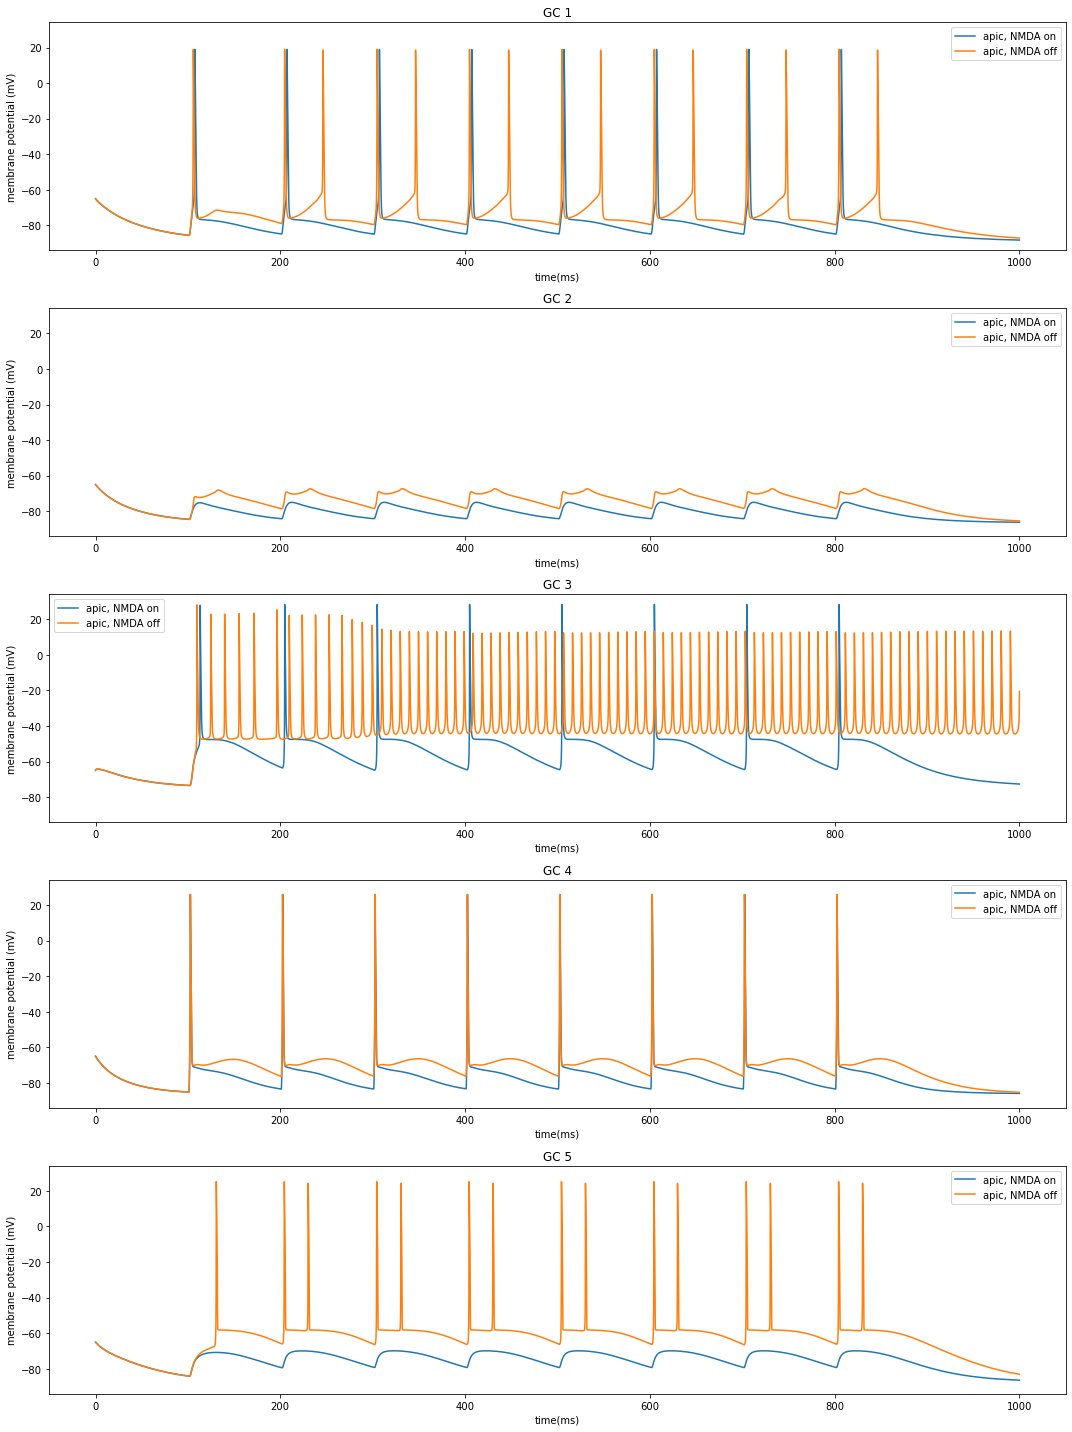

In [42]:
fig, axs = plt.subplots(5, 1, figsize=(15,20), sharey=True)
axs = axs.ravel()

for type, cells in gc_sources.items():
    for i, sources in enumerate(cells):
        cell_id = i + 1

        cell = gc_cells[i]

        try:
            a_or_d = getattr(cell.cell,type)
        except:
            print(f'{cell.cell_type} {cell.cell_id} has no {type}')
            break

        n_syns = 500

        for source in sources:

            
            ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=a_or_d[source]) for i in range(n_syns)]

            for ampa_nmda in ampa_nmda_syns:
                ampa_nmda.nmdatoggle = 0
                spike_train = h.Vector([100*i*ms for i in range(1,9)])
                vecStim = h.VecStim()
                vecStim.play(spike_train)
                netCon = h.NetCon(vecStim, ampa_nmda)
                netCon.weight[0] = 5000

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[i].plot(t, v, label=f'{type}, NMDA on')
        axs[i].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA on')
        

        for source in sources:

            ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=a_or_d[source]) for i in range(n_syns)]

            for ampa_nmda in ampa_nmda_syns:
                ampa_nmda.nmdatoggle = 1
                spike_train = h.Vector([100*i*ms for i in range(1,9)])
                vecStim = h.VecStim()
                vecStim.play(spike_train)
                netCon = h.NetCon(vecStim, ampa_nmda)
                netCon.weight[0] = 5000

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[i].plot(t, v, label=f'{type}, NMDA off')
        axs[i].set_xlabel('time(ms)')
        axs[i].set_ylabel('membrane potential (mV)')

        axs[i].set_title(f'{cell.cell_type} {cell.cell_id}')
        axs[i].legend()

plt.tight_layout()

## Individual Granule Cells

Mechanisms already loaded from path: Mechanisms.  Aborting.


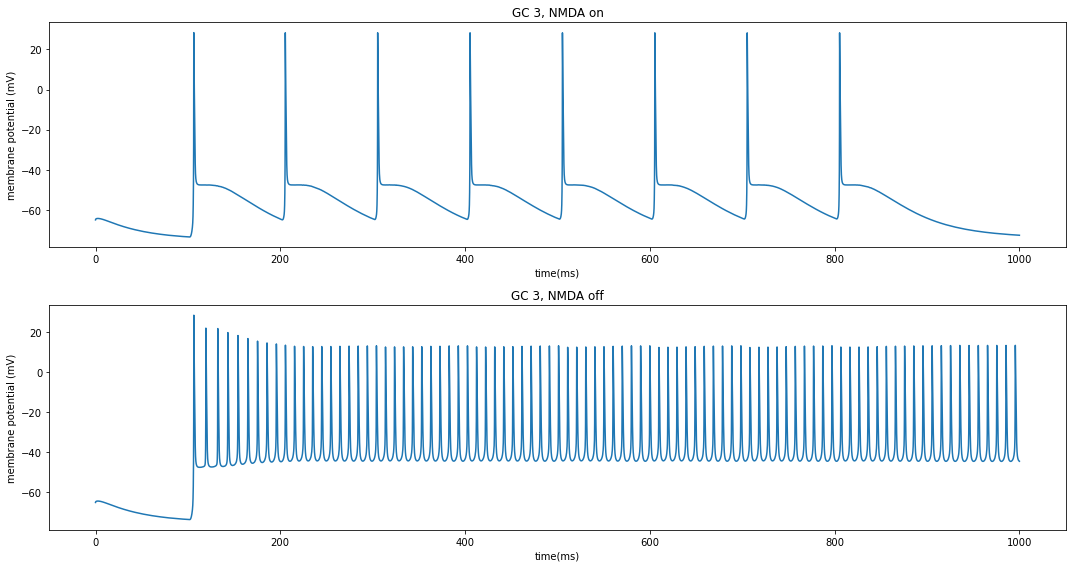

In [43]:
cell = ic.GC3()

fig, axs = plt.subplots(2, 1, figsize=(15,8), sharey=True)
axs = axs.ravel()

# iclamp = h.IClamp(0.5, sec=gc_cell.soma)
# iclamp.delay = delay
# iclamp.amp = amp
# iclamp.dur = dur

# spike_train = h.NetStim()
# spike_train.interval = 100
# spike_train.start = 100
# netCon = h.NetCon(spike_train, ampa_nmda)
# netCon.weight[0] = 1

n_syns = 500
apic_sources = gc_apic_sources[5]

for apic_source in apic_sources:

    ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=cell.cell.apic[apic_source]) for i in range(n_syns)]

    # ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.cell.apic[4])

    for ampa_nmda in ampa_nmda_syns:
        ampa_nmda.nmdatoggle = 0
        spike_train = h.Vector([100*i*ms for i in range(1,9)])
        vecStim = h.VecStim()
        vecStim.play(spike_train)
        netCon = h.NetCon(vecStim, ampa_nmda)
        netCon.weight[0] = 5000

t = h.Vector().record(h._ref_t)
v = h.Vector().record(cell.soma(0.5)._ref_v)

h.run()

axs[0].plot(t, v)
axs[0].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA on')
axs[0].set_xlabel('time(ms)')
axs[0].set_ylabel('membrane potential (mV)')

for apic_source in apic_sources:

    ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=cell.cell.apic[apic_source]) for i in range(n_syns)]

    # ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.cell.apic[4])

    for ampa_nmda in ampa_nmda_syns:
        ampa_nmda.nmdatoggle = 1
        spike_train = h.Vector([100*i*ms for i in range(1,9)])
        vecStim = h.VecStim()
        vecStim.play(spike_train)
        netCon = h.NetCon(vecStim, ampa_nmda)
        netCon.weight[0] = 5000

t = h.Vector().record(h._ref_t)
v = h.Vector().record(cell.soma(0.5)._ref_v)

h.run()

axs[1].plot(t, v)
axs[1].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA off')
axs[1].set_xlabel('time(ms)')
axs[1].set_ylabel('membrane potential (mV)')

plt.tight_layout()

In [ ]:
# ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.soma)

# vecStim = h.VecStim()
# vec = h.Vector(np.random.uniform(200,400))
# vec.indgen()

# vecStim.play(vec)

# netCon = h.NetCon(vecStim, ampa_nmda)
# netCon.weight[0] = 1

# [v for v in vec]

## Mitral Cells

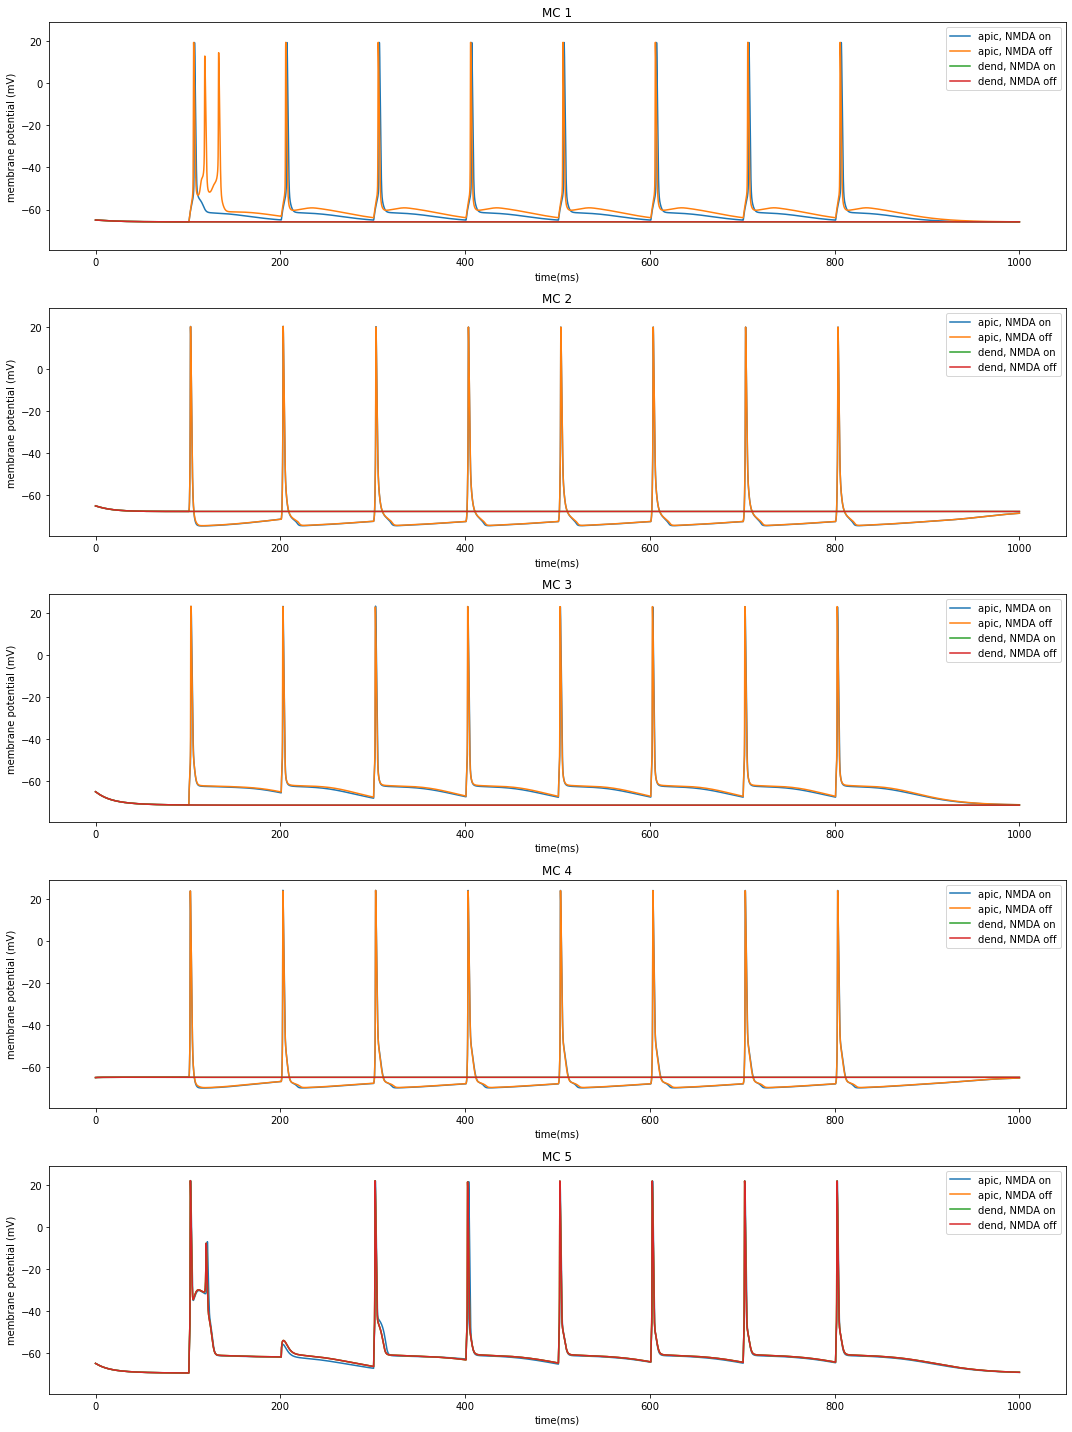

In [8]:
fig, axs = plt.subplots(5, 1, figsize=(15,20), sharey=True)
axs = axs.ravel()

for type, cells in gc_sources.items():
    for i, sources in enumerate(cells):
        cell_id = i + 1

        cell = mc_cells[i]

        try:
            a_or_d = getattr(cell.cell,type)
        except:
            print(f'{cell.cell_type} {cell.cell_id} has no {type}')
            break

        n_syns = 500

        for source in sources:

            
            ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=a_or_d[source]) for i in range(n_syns)]

            for ampa_nmda in ampa_nmda_syns:
                ampa_nmda.nmdatoggle = 0
                spike_train = h.Vector([100*i*ms for i in range(1,9)])
                vecStim = h.VecStim()
                vecStim.play(spike_train)
                netCon = h.NetCon(vecStim, ampa_nmda)
                netCon.weight[0] = 5000

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[i].plot(t, v, label=f'{type}, NMDA on')
        axs[i].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA on')
        

        for source in sources:

            ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=a_or_d[source]) for i in range(n_syns)]

            for ampa_nmda in ampa_nmda_syns:
                ampa_nmda.nmdatoggle = 1
                spike_train = h.Vector([100*i*ms for i in range(1,9)])
                vecStim = h.VecStim()
                vecStim.play(spike_train)
                netCon = h.NetCon(vecStim, ampa_nmda)
                netCon.weight[0] = 5000

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[i].plot(t, v, label=f'{type}, NMDA off')
        axs[i].set_xlabel('time(ms)')
        axs[i].set_ylabel('membrane potential (mV)')

        axs[i].set_title(f'{cell.cell_type} {cell.cell_id}')
        axs[i].legend()

plt.tight_layout()

## Individual Mitral Cells

Mechanisms already loaded from path: Mechanisms.  Aborting.


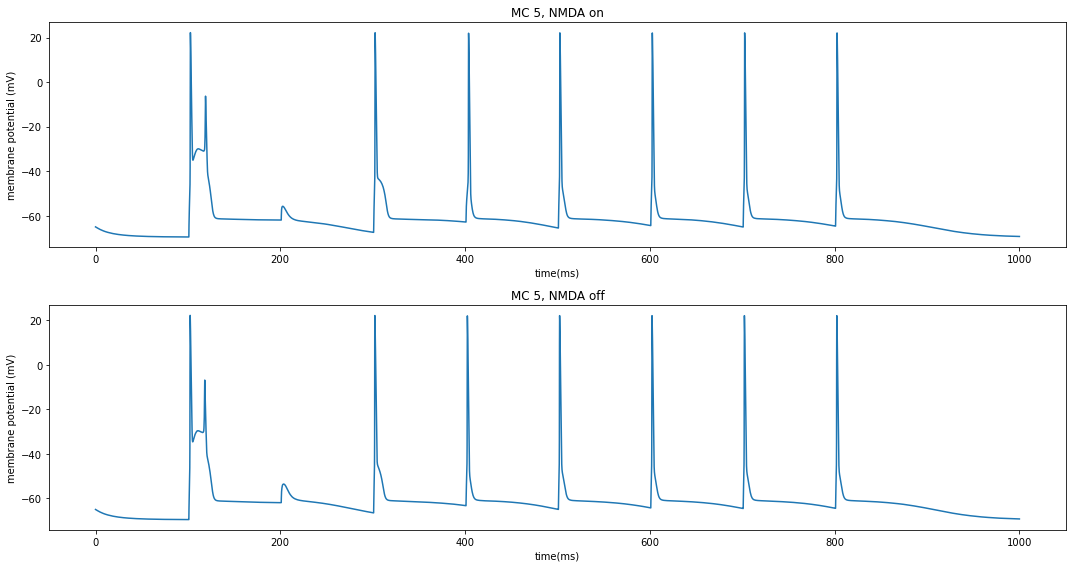

In [12]:
cell = ic.MC5()

fig, axs = plt.subplots(2, 1, figsize=(15,8), sharey=True)
axs = axs.ravel()

# iclamp = h.IClamp(0.5, sec=gc_cell.soma)
# iclamp.delay = delay
# iclamp.amp = amp
# iclamp.dur = dur

# spike_train = h.NetStim()
# spike_train.interval = 100
# spike_train.start = 100
# netCon = h.NetCon(spike_train, ampa_nmda)
# netCon.weight[0] = 1

n_syns = 500
apic_sources = mc_apic_sources[int(cell.cell_id)]

for apic_source in apic_sources:

    ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=cell.cell.apic[apic_source]) for i in range(n_syns)]

    # ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.cell.apic[4])

    for ampa_nmda in ampa_nmda_syns:
        ampa_nmda.nmdatoggle = 0
        spike_train = h.Vector([100*i*ms for i in range(1,9)])
        vecStim = h.VecStim()
        vecStim.play(spike_train)
        netCon = h.NetCon(vecStim, ampa_nmda)
        netCon.weight[0] = 5000

t = h.Vector().record(h._ref_t)
v = h.Vector().record(cell.soma(0.5)._ref_v)

h.run()

axs[0].plot(t, v)
axs[0].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA on')
axs[0].set_xlabel('time(ms)')
axs[0].set_ylabel('membrane potential (mV)')

for apic_source in apic_sources:

    ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=cell.cell.apic[apic_source]) for i in range(n_syns)]

    # ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.cell.apic[4])

    for ampa_nmda in ampa_nmda_syns:
        ampa_nmda.nmdatoggle = 1
        spike_train = h.Vector([100*i*ms for i in range(1,9)])
        vecStim = h.VecStim()
        vecStim.play(spike_train)
        netCon = h.NetCon(vecStim, ampa_nmda)
        netCon.weight[0] = 5000

t = h.Vector().record(h._ref_t)
v = h.Vector().record(cell.soma(0.5)._ref_v)

h.run()

axs[1].plot(t, v)
axs[1].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA off')
axs[1].set_xlabel('time(ms)')
axs[1].set_ylabel('membrane potential (mV)')

plt.tight_layout()

## Tufted Cells

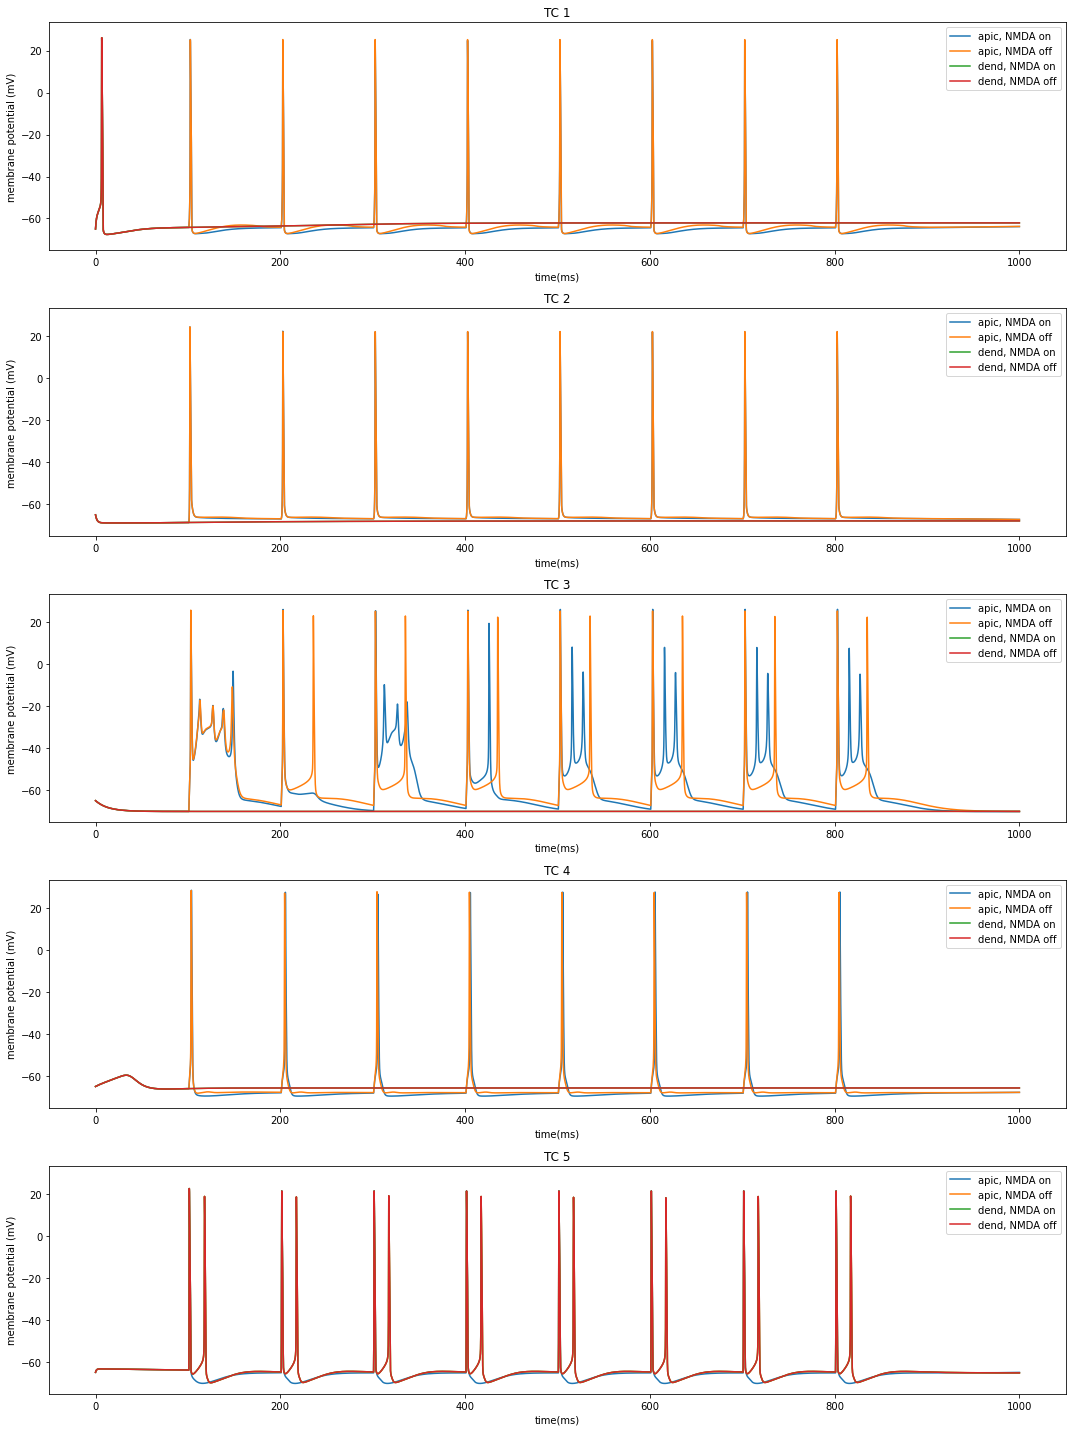

In [8]:
fig, axs = plt.subplots(5, 1, figsize=(15,20), sharey=True)
axs = axs.ravel()

for type, cells in gc_sources.items():
    for i, sources in enumerate(cells):
        cell_id = i + 1

        cell = tc_cells[i]

        try:
            a_or_d = getattr(cell.cell,type)
        except:
            print(f'{cell.cell_type} {cell.cell_id} has no {type}')
            break

        n_syns = 500

        for source in sources:

            
            ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=a_or_d[source]) for i in range(n_syns)]

            for ampa_nmda in ampa_nmda_syns:
                ampa_nmda.nmdatoggle = 0
                spike_train = h.Vector([100*i*ms for i in range(1,9)])
                vecStim = h.VecStim()
                vecStim.play(spike_train)
                netCon = h.NetCon(vecStim, ampa_nmda)
                netCon.weight[0] = 5000

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[i].plot(t, v, label=f'{type}, NMDA on')
        axs[i].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA on')
        

        for source in sources:

            ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=a_or_d[source]) for i in range(n_syns)]

            for ampa_nmda in ampa_nmda_syns:
                ampa_nmda.nmdatoggle = 1
                spike_train = h.Vector([100*i*ms for i in range(1,9)])
                vecStim = h.VecStim()
                vecStim.play(spike_train)
                netCon = h.NetCon(vecStim, ampa_nmda)
                netCon.weight[0] = 5000

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[i].plot(t, v, label=f'{type}, NMDA off')
        axs[i].set_xlabel('time(ms)')
        axs[i].set_ylabel('membrane potential (mV)')

        axs[i].set_title(f'{cell.cell_type} {cell.cell_id}')
        axs[i].legend()

plt.tight_layout()

## Individual Tufted Cells

Mechanisms already loaded from path: Mechanisms.  Aborting.


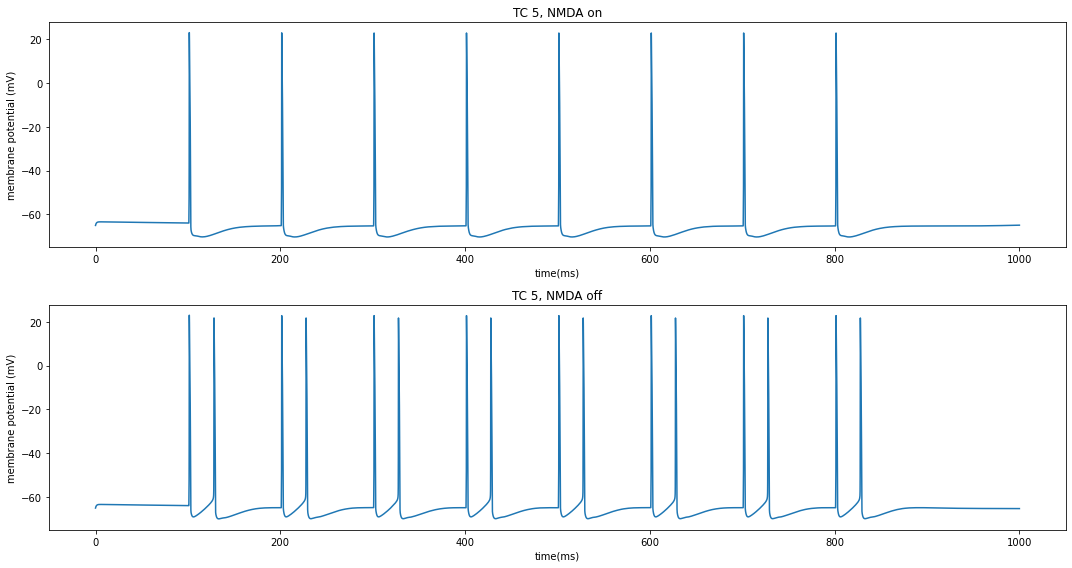

In [10]:
cell = ic.TC5()

fig, axs = plt.subplots(2, 1, figsize=(15,8), sharey=True)
axs = axs.ravel()

# iclamp = h.IClamp(0.5, sec=gc_cell.soma)
# iclamp.delay = delay
# iclamp.amp = amp
# iclamp.dur = dur

# spike_train = h.NetStim()
# spike_train.interval = 100
# spike_train.start = 100
# netCon = h.NetCon(spike_train, ampa_nmda)
# netCon.weight[0] = 1

n_syns = 500
apic_sources = tc_apic_sources[int(cell.cell_id)]

for apic_source in apic_sources:

    ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=cell.cell.apic[apic_source]) for i in range(n_syns)]

    # ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.cell.apic[4])

    for ampa_nmda in ampa_nmda_syns:
        ampa_nmda.nmdatoggle = 0
        spike_train = h.Vector([100*i*ms for i in range(1,9)])
        vecStim = h.VecStim()
        vecStim.play(spike_train)
        netCon = h.NetCon(vecStim, ampa_nmda)
        netCon.weight[0] = 5000

t = h.Vector().record(h._ref_t)
v = h.Vector().record(cell.soma(0.5)._ref_v)

h.run()

axs[0].plot(t, v)
axs[0].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA on')
axs[0].set_xlabel('time(ms)')
axs[0].set_ylabel('membrane potential (mV)')

for apic_source in apic_sources:

    ampa_nmda_syns = [h.AmpaNmdaSyn(0.5, sec=cell.cell.apic[apic_source]) for i in range(n_syns)]

    # ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.cell.apic[4])

    for ampa_nmda in ampa_nmda_syns:
        ampa_nmda.nmdatoggle = 1
        spike_train = h.Vector([100*i*ms for i in range(1,9)])
        vecStim = h.VecStim()
        vecStim.play(spike_train)
        netCon = h.NetCon(vecStim, ampa_nmda)
        netCon.weight[0] = 5000

t = h.Vector().record(h._ref_t)
v = h.Vector().record(cell.soma(0.5)._ref_v)

h.run()

axs[1].plot(t, v)
axs[1].set_title(f'{cell.cell_type} {cell.cell_id}, NMDA off')
axs[1].set_xlabel('time(ms)')
axs[1].set_ylabel('membrane potential (mV)')

plt.tight_layout()